In [1]:
# Import the needed packages

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
import networkx as nx

In [2]:
# read in the needed data

agent_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-19/agent_log_1.csv')
counts_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-19/counts_log_1.csv')
network_log_1_df = pd.read_csv('/users/yzhan636/data/akhann16/cadre_simulated_data/2022-10-19/network_log_1.csv')

In [3]:
# Print out the number of connections in each time step
network_1_count_summary = network_log_1_df.groupby(['tick'])['tick'].count()
network_1_count_summary = pd.DataFrame(data=network_1_count_summary)
print(network_1_count_summary)

# The first time starts at time 1

       tick
tick       
1     50220
11    50220
21    50220
31    50220
41    50220
...     ...
951   50222
961   50222
971   50222
981   50222
991   50222

[100 rows x 1 columns]


In [4]:
network_log_1_df_time_0 = network_log_1_df.loc[network_log_1_df['tick'] == 0]
network_log_1_df_time_1 = network_log_1_df.loc[network_log_1_df['tick'] == 1]
network_log_1_df_time_91 = network_log_1_df.loc[network_log_1_df['tick'] == 91]
network_log_1_df_time_491 = network_log_1_df.loc[network_log_1_df['tick'] == 491]
network_log_1_df_time_991 = network_log_1_df.loc[network_log_1_df['tick'] == 991]

agent_log_1_df_time_0 = agent_log_1_df.loc[agent_log_1_df['tick'] == 0]
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
agent_log_1_df_time_91 = agent_log_1_df.loc[agent_log_1_df['tick'] == 91]
agent_log_1_df_time_491 = agent_log_1_df.loc[agent_log_1_df['tick'] == 491]
agent_log_1_df_time_991 = agent_log_1_df.loc[agent_log_1_df['tick'] == 991]

# Analyze the networks part

### Q1: How many people are connected in the beginning (time step 1)?

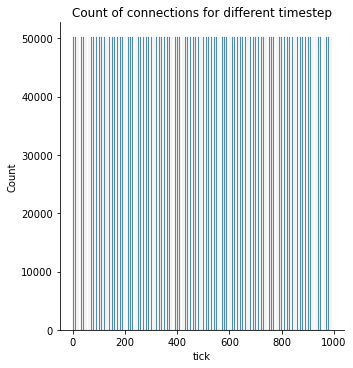

In [5]:
sns.displot(network_log_1_df, x="tick", binwidth=3).set(title='Count of connections for different timestep')

[Text(0.5, 1.0, 'Count of agents in different time ticks')]

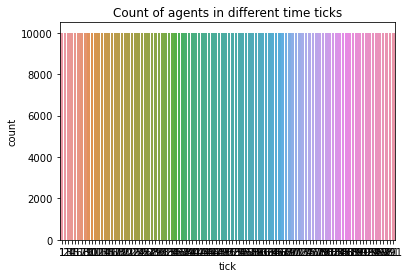

In [6]:
#sns.displot(agent_log_1_df, x="tick")
sns.countplot(x='tick', data=agent_log_1_df).set(title='Count of agents in different time ticks')

In [7]:
print(network_log_1_df_time_1)

       tick    p1     p2
0         1     0    967
1         1     0   1647
2         1     0   1811
3         1     0   2128
4         1     0   4811
...     ...   ...    ...
50215     1  9976   9992
50216     1  9982  10191
50217     1  9993  10021
50218     1  9993  10185
50219     1  9996  10087

[50220 rows x 3 columns]


In [8]:
network_log_1_df_time_1_p1 = network_log_1_df_time_1['p1'].tolist()
network_log_1_df_time_1_p2 = network_log_1_df_time_1['p2'].tolist()

print("The number of people that has connections at time step 1 is",len(np.unique(network_log_1_df_time_1_p1 + network_log_1_df_time_1_p2)))

The number of people that has connections at time step 1 is 10000


In [9]:
network_log_1_df_time_1_connections_list = []
for i in range(network_log_1_df_time_1.shape[0]):
    network_log_1_df_time_1_connections_list.append({network_log_1_df_time_1.iloc[i]["p1"], network_log_1_df_time_1.iloc[i]["p2"]})

network_log_1_df_time_1_connections_list_res = []
for item in network_log_1_df_time_1_connections_list: 
    if item not in network_log_1_df_time_1_connections_list_res: 
        network_log_1_df_time_1_connections_list_res.append(item) 

print("unique number of cennections at time 1 is", len(network_log_1_df_time_1_connections_list_res))

unique number of cennections at time 1 is 50220


### Q2: How many at the end (time step 1000)?

In [10]:
print(network_log_1_df_time_991)

         tick     p1     p2
4971616   991      0    967
4971617   991      0   1647
4971618   991      0   1811
4971619   991      0   2128
4971620   991      0   4811
...       ...    ...    ...
5021833   991  10387  10590
5021834   991  10392  10524
5021835   991  10395  10570
5021836   991  10396  10429
5021837   991  10396  10591

[50222 rows x 3 columns]


In [11]:
network_log_1_df_time_991_p1 = network_log_1_df_time_991['p1'].tolist()
network_log_1_df_time_991_p2 = network_log_1_df_time_991['p2'].tolist()

print("The number of people that has connections at time step 991 is",len(np.unique(network_log_1_df_time_991_p1 + network_log_1_df_time_991_p2)))

The number of people that has connections at time step 991 is 10000


In [12]:
network_log_1_df_time_991_connections_list = []
for i in range(network_log_1_df_time_991.shape[0]):
    network_log_1_df_time_991_connections_list.append({network_log_1_df_time_991.iloc[i]["p1"], network_log_1_df_time_991.iloc[i]["p2"]})

network_log_1_df_time_991_connections_list_res = []
for item in network_log_1_df_time_991_connections_list: 
    if item not in network_log_1_df_time_991_connections_list_res: 
        network_log_1_df_time_991_connections_list_res.append(item) 

print("unique number of cennections at time 991 is", len(network_log_1_df_time_991_connections_list_res))

unique number of cennections at time 991 is 50222


### Q3: How many at some point in the middle (around 500)?

In [13]:
print(network_log_1_df_time_491)

         tick     p1     p2
2460708   491      0    967
2460709   491      0   1647
2460710   491      0   1811
2460711   491      0   2128
2460712   491      0   4811
...       ...    ...    ...
2510917   491  10187  10284
2510918   491  10194  10363
2510919   491  10200  10245
2510920   491  10210  10219
2510921   491  10212  10225

[50214 rows x 3 columns]


In [14]:
network_log_1_df_time_491_p1 = network_log_1_df_time_491['p1'].tolist()
network_log_1_df_time_491_p2 = network_log_1_df_time_491['p2'].tolist()

print("The number of people that has connections at time step 491 is",len(np.unique(network_log_1_df_time_491_p1 + network_log_1_df_time_491_p2)))

The number of people that has connections at time step 491 is 10000


In [15]:
network_log_1_df_time_491_connections_list = []
for i in range(network_log_1_df_time_491.shape[0]):
    network_log_1_df_time_491_connections_list.append({network_log_1_df_time_491.iloc[i]["p1"], network_log_1_df_time_491.iloc[i]["p2"]})

network_log_1_df_time_491_connections_list_res = []
for item in network_log_1_df_time_491_connections_list: 
    if item not in network_log_1_df_time_491_connections_list_res: 
        network_log_1_df_time_491_connections_list_res.append(item) 

print("unique number of cennections at time 491 is", len(network_log_1_df_time_491_connections_list_res))

unique number of cennections at time 491 is 50214


### Q4: Of the relationships that exist in the beginning, how many exist at time step 100? How many exist at 500? At the end?

In [16]:
print("unique number of cennections at time 1 is", len(network_log_1_df_time_1_connections_list_res))

unique number of cennections at time 1 is 50220


In [17]:
network_log_1_df_time_91_p1 = network_log_1_df_time_91['p1'].tolist()
network_log_1_df_time_91_p2 = network_log_1_df_time_91['p2'].tolist()


network_log_1_df_time_91_connections_list = []

for i in range(network_log_1_df_time_91.shape[0]):
    network_log_1_df_time_91_connections_list.append({network_log_1_df_time_91.iloc[i]["p1"], network_log_1_df_time_91.iloc[i]["p2"]})


network_time_still_exist_at_91 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_91_connections_list: 
        network_time_still_exist_at_91.append(item) 

print("still exist at step 91:", len(network_time_still_exist_at_91))

still exist at step 91: 50220


In [18]:
network_time_still_exist_at_491 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_491_connections_list: 
        network_time_still_exist_at_491.append(item) 

print("still exist at step 491:", len(network_time_still_exist_at_491))

still exist at step 491: 48325


In [19]:
network_time_still_exist_at_991 = []

for item in network_log_1_df_time_1_connections_list: 
    if item in network_log_1_df_time_991_connections_list: 
        network_time_still_exist_at_991.append(item) 

print("still exist at step 991:", len(network_time_still_exist_at_991))

still exist at step 991: 46461


### Q5: Compare the agent and link differences between different time sticks

In [20]:
def compare_agent_difference(time_a, time_b, count_links_or_not):
    agent_log_1_df_time_a = agent_log_1_df.loc[agent_log_1_df['tick'] == time_a]
    agent_log_1_df_time_b = agent_log_1_df.loc[agent_log_1_df['tick'] == time_b]
    
    agent_log_1_df_time_a_list = agent_log_1_df_time_a['agent_id'].tolist()
    agent_log_1_df_time_b_list = agent_log_1_df_time_b['agent_id'].tolist()
    
    agents_in_a_but_not_in_b = []
    agents_in_b_but_not_in_a = []
    
    for item in agent_log_1_df_time_a_list: 
        if item not in agent_log_1_df_time_b_list: 
            agents_in_a_but_not_in_b.append(item)
    
    for item in agent_log_1_df_time_b_list: 
        if item not in agent_log_1_df_time_a_list: 
            agents_in_b_but_not_in_a.append(item)
        
    print("Here are the agents in time", time_a, "but not in time", time_b, agents_in_a_but_not_in_b, "and the length is", len(agents_in_a_but_not_in_b))
    print("Here are the agents in time", time_b, "but not in time", time_a, agents_in_b_but_not_in_a, "and the length is", len(agents_in_b_but_not_in_a))
    
    if count_links_or_not == True:
        links_of_agents_in_a_but_not_in_b = []
        links_of_agents_in_b_but_not_in_a = []
        
        for agent in agents_in_a_but_not_in_b:
            links_of_agents_in_a_but_not_in_b.append([agent, len(network_log_1_df.loc[(network_log_1_df['tick'] == time_a)&((network_log_1_df['p1'] == agent) | (network_log_1_df['p2'] == agent))])])
        
        for agent in agents_in_b_but_not_in_a:
            links_of_agents_in_b_but_not_in_a.append([agent, len(network_log_1_df.loc[(network_log_1_df['tick'] == time_b)&((network_log_1_df['p1'] == agent) | (network_log_1_df['p2'] == agent))])])
        
        print("Here are the agents and the number of links assigned to them in a not in b:", links_of_agents_in_a_but_not_in_b)
        print("Here are the agents and the number of links assigned to them in b not in a:", links_of_agents_in_b_but_not_in_a)
    


In [21]:
compare_agent_difference(1, 371, True)

Here are the agents in time 1 but not in time 371 [67, 121, 160, 177, 223, 235, 352, 361, 396, 397, 461, 554, 560, 610, 861, 880, 930, 949, 965, 990, 1002, 1072, 1108, 1131, 1203, 1206, 1417, 1452, 1512, 1573, 1574, 1625, 1655, 1722, 1773, 1793, 1902, 1911, 1968, 2154, 2200, 2235, 2243, 2334, 2640, 2654, 2736, 2871, 2924, 3124, 3184, 3205, 3291, 3314, 3368, 3387, 3450, 3517, 3552, 3608, 3639, 3655, 3692, 3700, 3719, 3730, 3762, 3824, 3854, 3885, 3902, 3907, 3927, 3928, 4006, 4018, 4043, 4082, 4122, 4149, 4160, 4166, 4168, 4304, 4351, 4358, 4396, 4448, 4555, 4562, 4566, 4580, 4596, 4616, 4665, 4786, 4956, 4998, 5043, 5148, 5168, 5296, 5306, 5321, 5387, 5421, 5429, 5515, 5523, 5542, 5648, 5711, 5717, 5757, 5796, 5834, 5857, 5859, 6042, 6052, 6138, 6139, 6183, 6257, 6290, 6319, 6320, 6410, 6567, 6611, 6619, 6666, 6798, 6821, 6838, 6905, 6968, 7066, 7168, 7193, 7227, 7233, 7244, 7302, 7393, 7418, 7470, 7476, 7556, 7583, 7621, 7663, 7684, 7688, 7895, 7950, 7961, 7966, 8014, 8080, 8086, 8174

In [22]:
compare_agent_difference(1, 91, False)

Here are the agents in time 1 but not in time 91 [] and the length is 0
Here are the agents in time 91 but not in time 1 [] and the length is 0


In [23]:
compare_agent_difference(1, 491, False)

Here are the agents in time 1 but not in time 491 [67, 121, 160, 177, 223, 235, 352, 361, 396, 397, 461, 554, 560, 610, 861, 880, 930, 949, 965, 990, 1002, 1072, 1108, 1131, 1203, 1206, 1417, 1452, 1512, 1573, 1574, 1625, 1655, 1722, 1773, 1793, 1902, 1911, 1968, 2154, 2200, 2235, 2243, 2334, 2640, 2654, 2736, 2871, 2924, 3124, 3184, 3205, 3291, 3314, 3368, 3387, 3450, 3517, 3552, 3608, 3639, 3655, 3692, 3700, 3719, 3730, 3762, 3824, 3854, 3885, 3902, 3907, 3927, 3928, 4006, 4018, 4043, 4082, 4122, 4149, 4160, 4166, 4168, 4304, 4351, 4358, 4396, 4448, 4555, 4562, 4566, 4580, 4596, 4616, 4665, 4786, 4956, 4998, 5043, 5148, 5168, 5296, 5306, 5321, 5387, 5421, 5429, 5515, 5523, 5542, 5648, 5711, 5717, 5757, 5796, 5834, 5857, 5859, 6042, 6052, 6138, 6139, 6183, 6257, 6290, 6319, 6320, 6410, 6567, 6611, 6619, 6666, 6798, 6821, 6838, 6905, 6968, 7066, 7168, 7193, 7227, 7233, 7244, 7302, 7393, 7418, 7470, 7476, 7556, 7583, 7621, 7663, 7684, 7688, 7895, 7950, 7961, 7966, 8014, 8080, 8086, 8174

In [24]:
compare_agent_difference(1, 991, False)

Here are the agents in time 1 but not in time 991 [52, 67, 121, 131, 159, 160, 177, 223, 235, 352, 361, 396, 397, 461, 465, 527, 554, 560, 610, 739, 764, 793, 861, 866, 880, 894, 930, 949, 954, 964, 965, 990, 1002, 1027, 1072, 1082, 1108, 1131, 1203, 1206, 1253, 1288, 1315, 1350, 1417, 1444, 1452, 1473, 1509, 1512, 1559, 1573, 1574, 1613, 1625, 1655, 1659, 1679, 1695, 1722, 1732, 1754, 1773, 1793, 1821, 1857, 1902, 1911, 1913, 1914, 1919, 1968, 1994, 2006, 2052, 2078, 2105, 2110, 2117, 2151, 2154, 2194, 2200, 2235, 2243, 2332, 2334, 2335, 2433, 2461, 2500, 2530, 2603, 2606, 2622, 2640, 2654, 2689, 2736, 2801, 2828, 2871, 2911, 2917, 2921, 2924, 2987, 3005, 3020, 3035, 3044, 3060, 3124, 3162, 3184, 3185, 3205, 3240, 3291, 3314, 3318, 3330, 3355, 3368, 3371, 3387, 3388, 3396, 3435, 3450, 3476, 3517, 3540, 3552, 3575, 3608, 3639, 3655, 3691, 3692, 3696, 3700, 3719, 3730, 3762, 3824, 3847, 3854, 3879, 3880, 3885, 3886, 3902, 3907, 3908, 3914, 3927, 3928, 3968, 4006, 4018, 4043, 4048, 4082,

In [25]:
compare_agent_difference(491, 991, False)

Here are the agents in time 491 but not in time 991 [52, 131, 159, 465, 527, 739, 764, 793, 866, 894, 954, 964, 1027, 1082, 1253, 1288, 1315, 1350, 1444, 1473, 1509, 1559, 1613, 1659, 1679, 1695, 1732, 1754, 1821, 1857, 1913, 1914, 1919, 1994, 2006, 2052, 2078, 2105, 2110, 2117, 2151, 2194, 2332, 2335, 2433, 2461, 2500, 2530, 2603, 2606, 2622, 2689, 2801, 2828, 2911, 2917, 2921, 2987, 3005, 3020, 3035, 3044, 3060, 3162, 3185, 3240, 3318, 3330, 3355, 3371, 3388, 3396, 3435, 3476, 3540, 3575, 3691, 3696, 3847, 3879, 3880, 3886, 3908, 3914, 3968, 4048, 4089, 4092, 4248, 4272, 4279, 4357, 4376, 4384, 4406, 4436, 4496, 4529, 4768, 4771, 4775, 4928, 4935, 4999, 5059, 5083, 5091, 5147, 5213, 5471, 5519, 5660, 5698, 5713, 5732, 5790, 5823, 5830, 5847, 5876, 5898, 5923, 5963, 6011, 6063, 6148, 6155, 6165, 6238, 6258, 6271, 6296, 6479, 6490, 6533, 6558, 6565, 6685, 6739, 6747, 6865, 6941, 7016, 7220, 7362, 7457, 7462, 7489, 7497, 7501, 7518, 7524, 7529, 7534, 7560, 7671, 7682, 7749, 7819, 7896, 

In [26]:
# Now we want to make sure that if time 0 exists
print(network_log_1_df_time_0)
print(agent_log_1_df_time_0)

#Nope, time 0 does not exist

Empty DataFrame
Columns: [tick, p1, p2]
Index: []
Empty DataFrame
Columns: [tick, agent_id, agent_age, agent_race, agent_female, agent_alc_use_status, agent_smoking_status, agent_last_incarceration_tick, agent_last_release_tick, agent_current_incarceration_status, agent_entry_at_tick, agent_exit_at_tick]
Index: []


# Analyze the agent_log part

### Q6: Visualize the networks: beginning, middle, end. Create different versions of this network structure, where nodes are highlighted by age, race, sex, incarceration status, etc etc. 


In [27]:
print(agent_log_1_df_time_1)

      tick  agent_id  agent_age agent_race  agent_female  \
0        1         0         21      White             1   
1        1         1         46      Asian             1   
2        1         2         18   Hispanic             0   
3        1         3         58   Hispanic             0   
4        1         4         58      White             1   
...    ...       ...        ...        ...           ...   
9995     1     10208         18      White             0   
9996     1     10209         18      White             1   
9997     1     10210         18      White             0   
9998     1     10211         18      Black             0   
9999     1     10212         18      White             0   

      agent_alc_use_status agent_smoking_status  \
0                        1                Never   
1                        1                Never   
2                        3              Current   
3                        1              Current   
4                       

KeyboardInterrupt: 

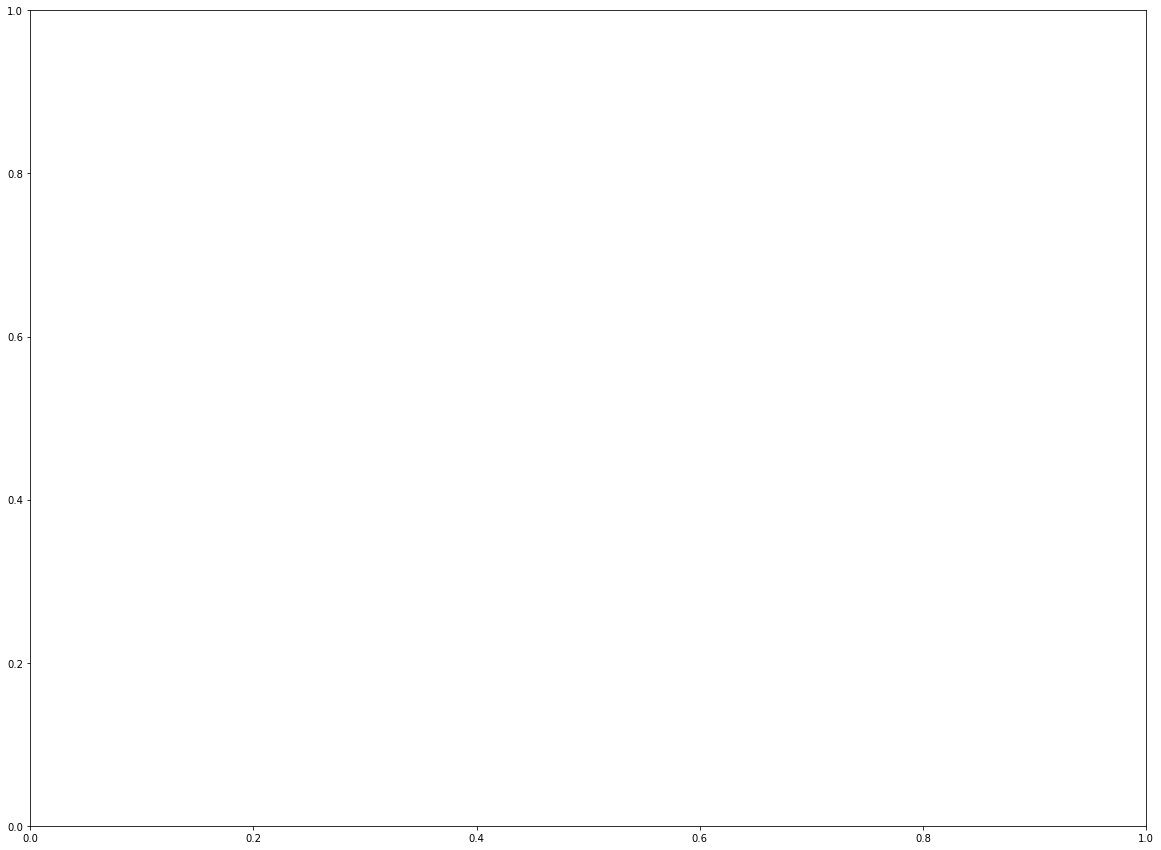

In [28]:
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1 = agent_log_1_df_time_1.set_index('agent_id')
agent_log_1_df_time_1 = agent_log_1_df_time_1.reindex(G.nodes())

agent_log_1_df_time_1['agent_race'] = pd.Categorical(agent_log_1_df_time_1['agent_race'])
agent_log_1_df_time_1['agent_race'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'blue', 'green', 'red', 'purple'])


# Black:blue, white:red, asian:green, Hispanic:green, Asian:yellow, NaN:purple
# Draw graph
nx.draw(G, with_labels=False, node_color=agent_log_1_df_time_1['agent_race'].cat.codes, cmap=cmap)

In [ ]:
agent_log_1_df_time_1 = agent_log_1_df.loc[agent_log_1_df['tick'] == 1]
# Create graph object
fig, ax = plt.subplots(figsize=(20, 15))

G = nx.from_pandas_edgelist(network_log_1_df_time_1, 'p1', 'p2', create_using=nx.Graph())

# Make types into categories
agent_log_1_df_time_1 = agent_log_1_df_time_1.set_index('agent_id')
agent_log_1_df_time_1 = agent_log_1_df_time_1.reindex(G.nodes())

agent_log_1_df_time_1['agent_race'] = pd.Categorical(agent_log_1_df_time_1['agent_race'])
agent_log_1_df_time_1['agent_race'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['yellow', 'blue', 'green', 'red', 'purple'])


In [29]:
print(agent_log_1_df_time_1['agent_race'].cat.codes)

agent_id
0       3
967     2
1647    3
1811    3
2128    3
       ..
9693    3
8749    3
8542    3
9385    1
9142    3
Length: 10000, dtype: int8


In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000})

k=agent_log_1_df_time_1['agent_race'].cat.codes
print(k)

In [30]:
print(agent_log_1_df_time_1['agent_race'].unique())
print(agent_log_1_df_time_1['agent_race'].isnull().sum())

['White', 'Hispanic', 'Asian', 'Black']
Categories (4, object): ['Asian', 'Black', 'Hispanic', 'White']
0
